# Gender Classification Using PyTorch

We will be following the below work-flow:
1. Importing Dependencies
2. Data Loading & Preparation
3. Model Creation
4. Loss Function & Optimizer Setup
5. Training & Testing Loop Setup
6. Evaluation

In [1]:
RANDOM_SEED = 42

## 1. Importing Necessary Libraries & Dependencies

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

## 2. Data Loading & Preparation

In [3]:
df = pd.read_csv('gender_classification.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
# Check if any missing value exists
print(df['long_hair'].isnull().sum())
print(df['forehead_width_cm'].isnull().sum())
print(df['forehead_height_cm'].isnull().sum())
print(df['nose_wide'].isnull().sum())
print(df['nose_long'].isnull().sum())
print(df['lips_thin'].isnull().sum())
print(df['distance_nose_to_lip_long'].isnull().sum())
print(df['gender'].isnull().sum())

0
0
0
0
0
0
0
0


In [5]:
# Label Encoding 'gender' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [6]:
df.head(2)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0


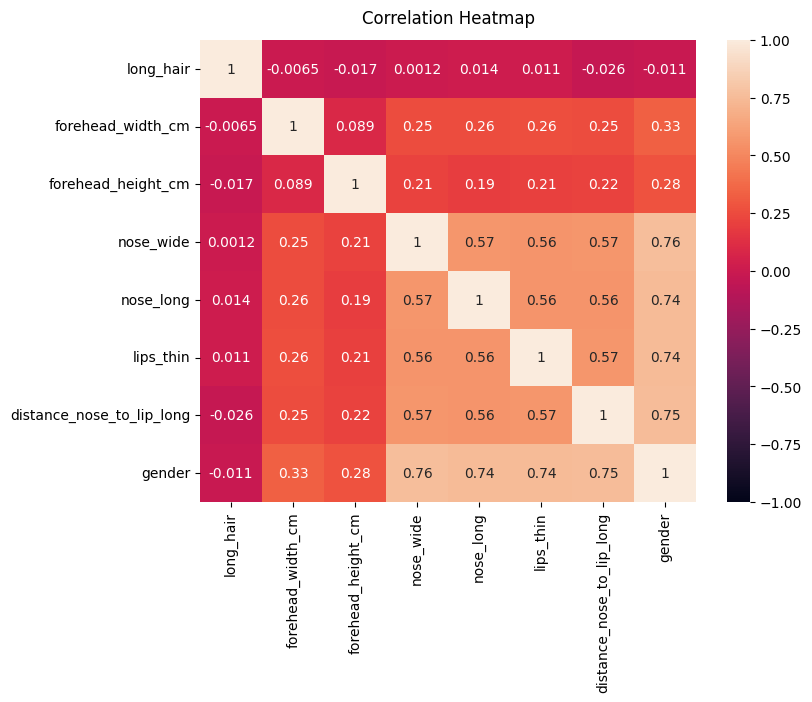

In [7]:
# Correlation Matrix
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12); # pad defines the distance of the title from the top of the heatmap.
plt.show()

In [8]:
# Seperation of features(X) and target(y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
X[:5]

array([[ 1. , 11.8,  6.1,  1. ,  0. ,  1. ,  1. ],
       [ 0. , 14. ,  5.4,  0. ,  0. ,  1. ,  0. ],
       [ 0. , 11.8,  6.3,  1. ,  1. ,  1. ,  1. ],
       [ 0. , 14.4,  6.1,  0. ,  1. ,  1. ,  1. ],
       [ 1. , 13.5,  5.9,  0. ,  0. ,  0. ,  0. ]])

In [10]:
y[:5]

array([1, 0, 1, 1, 0])

In [11]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [12]:
print(f"X_train length: {len(X_train)}")
print(f"X_test length: {len(X_test)}")
print(f"y_train length: {len(y_train)}")
print(f"y_test length: {len(y_test)}")

X_train length: 4000
X_test length: 1001
y_train length: 4000
y_test length: 1001


In [13]:
# Conversion of ndarray to tensors
X_train = torch.from_numpy(X_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

## 3. Model Creation

In [14]:
X_train.shape

torch.Size([4000, 7])

In [15]:
# Define Model V0
class GenderClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Linear(in_features=7, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=1)
    )

  def forward(self, x):
    return self.linear_stack(x)

In [16]:
# Instantiate Model
model = GenderClassification()

## 3. Loss Function & Optimizer Setup

In [17]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss: built in sigmoid activation function

# Setup optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

## 4. Training & Testing Loop

In [18]:
# Importing Accuracy Function
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper)functions.py already exits, skipping download!")
else:
  print("Downloading helper_functions.py-------------")
  request = requests.get("https://raw.githubusercontent.com/nepal-manjil32/pytorch-models/refs/heads/main/helper_functions/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

helper)functions.py already exits, skipping download!


In [19]:
torch.manual_seed(RANDOM_SEED)

epochs = 6000
epoch_count = []
train_loss_value = []
test_loss_value = []
train_acc_value = []
test_acc_value = []

for epoch in tqdm(range(epochs)):
  epoch_count.append(epoch)
  ### Training Loop ###
  ## 1. Forward Pass
  model.train()
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  ## 2. Calculate the loss/accuracy
  train_loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
  train_acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  train_loss_value.append(train_loss)
  train_acc_value.append(train_acc)

  ## 3. Set optimizer zero_grad()
  optimizer.zero_grad()

  ## 4. Perform backpropagation
  train_loss.backward()

  ## 5. Optimizer step (gradient descent)
  optimizer.step()


  ### Testing Loop ###
  test_logits = model(X_test).squeeze()
  test_pred = torch.round(torch.sigmoid(test_logits))
  test_loss = loss_fn(test_logits, y_test)
  test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
  test_loss_value.append(test_loss)
  test_acc_value.append(test_acc)

  ### Print What's Happening ###
  if epoch % 500 == 0:
    print(f"\nEpoch: {epoch} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

  0%|          | 0/6000 [00:00<?, ?it/s]


Epoch: 0 | Train Loss: 0.7507 | Train Acc: 49.9750 | Test Loss: 0.7453 | Test Acc: 50.1499

Epoch: 500 | Train Loss: 0.6702 | Train Acc: 63.0750 | Test Loss: 0.6715 | Test Acc: 63.2368

Epoch: 1000 | Train Loss: 0.3952 | Train Acc: 95.8500 | Test Loss: 0.4045 | Test Acc: 95.4046

Epoch: 1500 | Train Loss: 0.1198 | Train Acc: 95.7250 | Test Loss: 0.1350 | Test Acc: 95.1049

Epoch: 2000 | Train Loss: 0.0968 | Train Acc: 95.7750 | Test Loss: 0.1110 | Test Acc: 95.3047

Epoch: 2500 | Train Loss: 0.0914 | Train Acc: 95.6000 | Test Loss: 0.1050 | Test Acc: 95.2048

Epoch: 3000 | Train Loss: 0.0895 | Train Acc: 95.4250 | Test Loss: 0.1029 | Test Acc: 95.2048

Epoch: 3500 | Train Loss: 0.0886 | Train Acc: 95.3750 | Test Loss: 0.1018 | Test Acc: 95.0050

Epoch: 4000 | Train Loss: 0.0880 | Train Acc: 95.4250 | Test Loss: 0.1011 | Test Acc: 95.2048

Epoch: 4500 | Train Loss: 0.0876 | Train Acc: 95.4500 | Test Loss: 0.1007 | Test Acc: 95.2048

Epoch: 5000 | Train Loss: 0.0872 | Train Acc: 95.5250

## 6. Evaluation

In [20]:
# Converting to ndarray from tensors for plotting
epoch_count = torch.tensor(epoch_count).numpy()
train_loss_value = torch.tensor(train_loss_value).numpy()
test_loss_value = torch.tensor(test_loss_value).numpy()

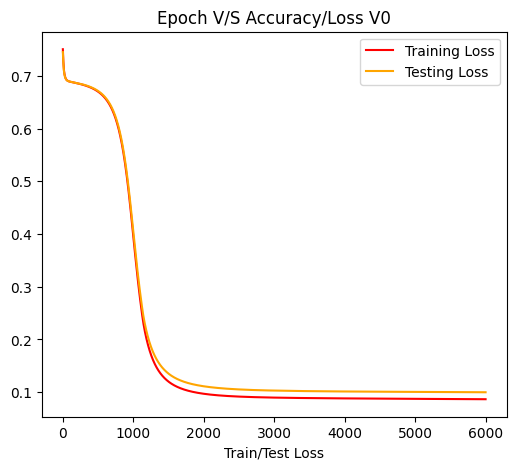

In [21]:
# Epochs V/S Accuracy/Loss Curve
plt.figure(figsize=(6,5))
plt.plot(epoch_count, train_loss_value, color='red', label="Training Loss")
plt.plot(epoch_count, test_loss_value, color='orange', label="Testing Loss")
plt.title("Epoch V/S Accuracy/Loss V0")
plt.xlabel("Epochs")
plt.xlabel("Train/Test Loss")

plt.legend()
plt.show()